<a href="https://www.kaggle.com/code/rupanshirana/titanic-data-train-eda?scriptVersionId=114525119" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic-data/train.csv
/kaggle/input/titanic-data/test.csv
/kaggle/input/titanic-data/gender_submission.csv


## Reading the data set of titanic-data/train

In [2]:
df=pd.read_csv("//kaggle//input/titanic-data//train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## checking the shape of data

In [3]:
df.shape

(891, 12)

### how does the data look?

In [4]:
df.head()  ## viewing top 5 rows
df.sample(5) ## randomly choose 5 rows to get rid off biased nature of data that may seen 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C


### checking the column types

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Preprocessing
- we want survived,Pclass data in categorical form to do analysis, so we will change their data type to object for analysis
- from this, we can say survived and pclass shoud be of categorical type as they are off numeric type now

#### checking the columns names

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## basic information

In [7]:
df.info()
## from this we know, age, cabin and embarked have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### checking the missing values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### checking missing %

In [9]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,"----",df[i].isnull().sum()/df.shape[0]*100)

Age ---- 19.865319865319865
Cabin ---- 77.10437710437711
Embarked ---- 0.22446689113355783


In [10]:
df["Cabin"].unique()
## we want alphabet only ,to do analysis because of numbers we are messy data

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

#### nan value default type is float, so fill the missing values of cabin first

In [11]:
df["Cabin"].fillna(df["Cabin"].mode()[0],inplace=True)

In [12]:
df["Cabin_name"]=df["Cabin"].apply(lambda x:x[0])
df["Cabin_name"]

0      B
1      C
2      B
3      C
4      B
      ..
886    B
887    B
888    B
889    C
890    B
Name: Cabin_name, Length: 891, dtype: object

In [13]:
df["Cabin_name"].unique()

array(['B', 'C', 'E', 'G', 'D', 'A', 'F', 'T'], dtype=object)

### filling the missing values of embarked and age

In [14]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

### since age is of numeric type, either we can it fill mean or median but first we have to check for outliers than only we can take the decision

In [15]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

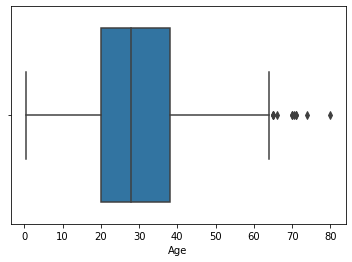

In [16]:
sns.boxplot(df["Age"])

In [17]:
df["Age"].skew()

0.38910778230082704

In [18]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_name     0
dtype: int64

### from this data we can find passengerid and ticket is irrelevant so drop/delete it

In [20]:
df.drop(columns=["PassengerId","Ticket","Cabin"],inplace=True)

In [21]:
df.shape

(891, 10)

In [22]:
df.duplicated().sum()  ## no rows is duplicated

0

In [23]:
for i in df.columns:
    print(i,"---------------",df[i].unique())

Survived --------------- [0 1]
Pclass --------------- [3 1 2]
Name --------------- ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred

## checking statistical summary of data

In [24]:
df.describe().T  ## for numeric data type

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [25]:
df.describe(include="object").T  ## for object data type

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Embarked,891,3,S,646
Cabin_name,891,8,B,734


### checking the correlation

In [26]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


- from this we know,there is no strong correlation between the columns
- relation between pclass and fare is of moderate that is -0.549500, it clearly depicts the fare of first passenger class is high

<AxesSubplot:>

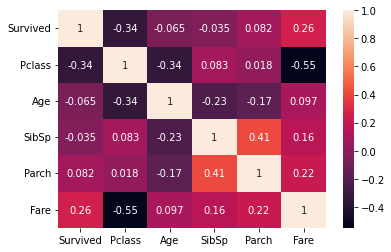

In [27]:
sns.heatmap(df.corr(),annot=True)

## EDA

### checking the column types again

In [28]:
df.dtypes

Survived        int64
Pclass          int64
Name           object
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
Cabin_name     object
dtype: object

In [29]:
l=["Survived","Pclass"]
for i in l:
    df[i]= df[i].astype("object")

In [30]:
df.dtypes

Survived       object
Pclass         object
Name           object
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
Cabin_name     object
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    object 
 1   Pclass      891 non-null    object 
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked    891 non-null    object 
 9   Cabin_name  891 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 69.7+ KB


## first fetch categorical object

In [32]:
df.select_dtypes(include="object").columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Embarked', 'Cabin_name'], dtype='object')

### taking columns one by one (univariate analysis)

### Survived

In [33]:
df["Survived"].unique()

array([0, 1], dtype=object)

In [34]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## OR

In [35]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

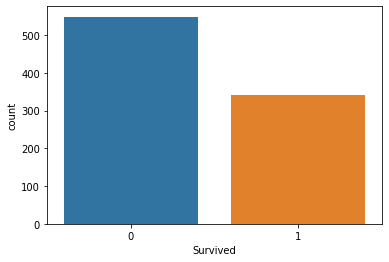

In [36]:
sns.countplot(df["Survived"])

- insights: more people died 

In [37]:
import matplotlib.pyplot as plt

### how many percent survived

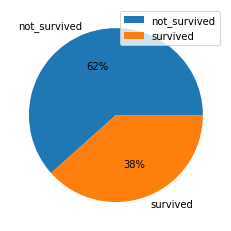

In [38]:
l1=["not_survived","survived"]
l=list(df["Survived"].value_counts())
l
plt.pie(l,labels=l1,autopct="%0.0f%%");
plt.legend()

In [39]:
df["Survived"].value_counts()/len(df)*100  ## using pandas

0    61.616162
1    38.383838
Name: Survived, dtype: float64

## PClass

In [40]:
df["Pclass"].unique()

array([3, 1, 2], dtype=object)

In [41]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

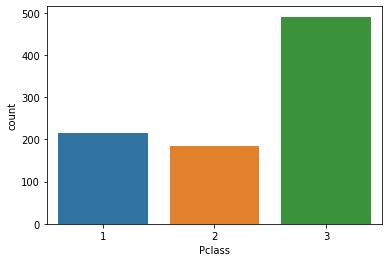

In [42]:
sns.countplot(df["Pclass"])

- insights: people travelled more in 3rd class and min in 2nd class

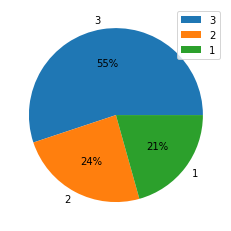

In [43]:
l1=["3","2","1"]
l=list(df["Pclass"].value_counts())
l
plt.pie(l,labels=l1,autopct="%0.0f%%");
plt.legend()

In [44]:
df["Pclass"].value_counts()/len(df)*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

- insights: 55% people travelled in 3rd class, 24% travelled in 2nd class and 21% travelled in 1st class

## Sex

In [45]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [46]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

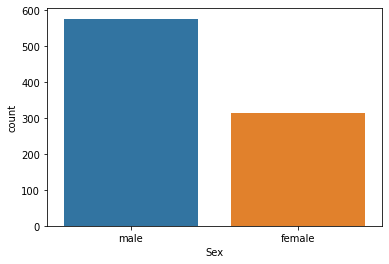

In [47]:
sns.countplot(df["Sex"])

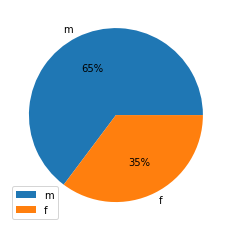

In [48]:
l1=["m","f"]
l=list(df["Sex"].value_counts())
l
plt.pie(l,labels=l1,autopct="%0.0f%%");
plt.legend()

In [49]:
df["Sex"].value_counts()/len(df)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

- insights : 64% male travelled while female was 35%

## Embarked

In [50]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [51]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

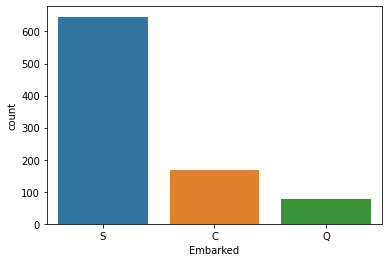

In [52]:
sns.countplot(df["Embarked"])

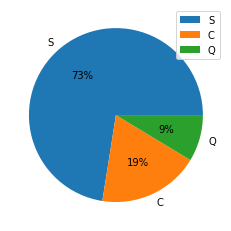

In [53]:
l1=["S","C","Q"]
l=list(df["Embarked"].value_counts())
l
plt.pie(l,labels=l1,autopct="%0.0f%%");
plt.legend()

In [54]:
df["Embarked"].value_counts()/len(df)*100

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

- insights: 72% people travelled in s , 18% in c and 8% in q

## Cabin_name

In [55]:
df["Cabin_name"].unique()

array(['B', 'C', 'E', 'G', 'D', 'A', 'F', 'T'], dtype=object)

In [56]:
df["Cabin_name"].value_counts()

B    734
C     59
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_name, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cabin_name', ylabel='count'>

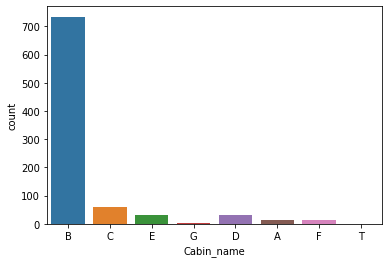

In [57]:
sns.countplot(df["Cabin_name"])

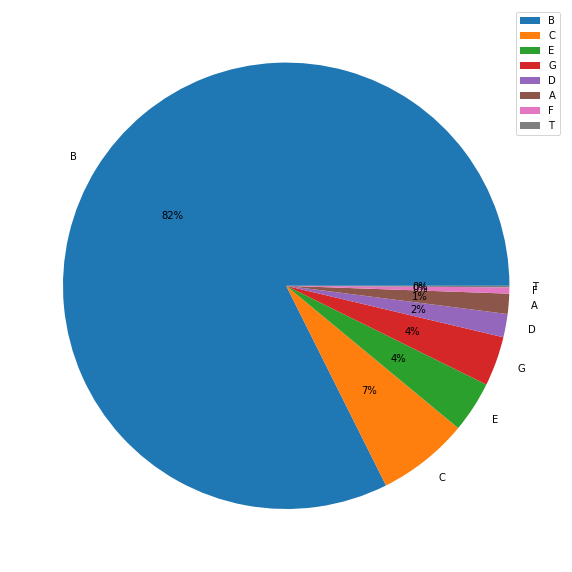

In [58]:
plt.figure(figsize=(10,12))
l1=["B","C","E","G","D","A","F","T"]
l=list(df["Cabin_name"].value_counts())
l
plt.pie(l,labels=l1,autopct="%0.0f%%");
plt.legend()

In [59]:
df["Cabin_name"].value_counts()/len(df)*100

B    82.379349
C     6.621773
D     3.703704
E     3.591470
A     1.683502
F     1.459035
G     0.448934
T     0.112233
Name: Cabin_name, dtype: float64

- insights : 82% were in B cabin

## Name

In [60]:
df["Name"].nunique()

891

### fetching salutations of names (feature splitting)

In [61]:
df["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

### feature splitting part of feature construction under feature engineering

In [62]:
df["salutation"]=df["Name"].str.split(",",expand=True)[1].str.split(".",expand=True)[0]
df["salutation"]


0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: salutation, Length: 891, dtype: object

In [63]:
df["salutation"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

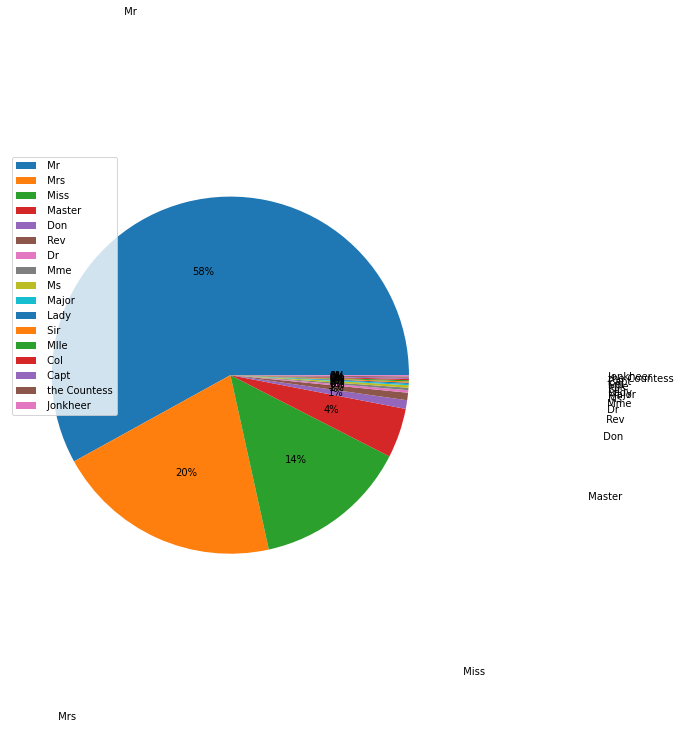

In [64]:
plt.figure(figsize=(8,10))
l1=[' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer']
l=list(df["salutation"].value_counts())
l
plt.pie(l,labels=l1,autopct="%0.0f%%",labeldistance=2.1);
plt.legend()

- Can not see properly, so we will use countplot to plot 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


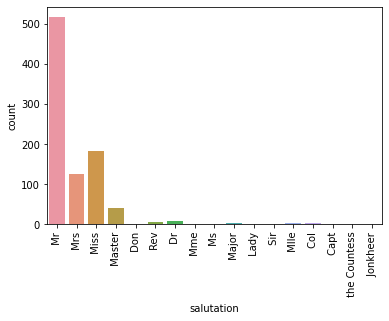

In [65]:
sns.countplot(df["salutation"]);
plt.xticks(rotation=90);

- 'Mr' Salutation was used most and 'Jonkheer' was used least

## Taking numeric data

In [66]:
numeric=["int","float"]
df.select_dtypes(include=numeric).columns

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## sibsp, Parch

- for family count, we will add sibsp and parch columns, again feature engineering

In [67]:
df["family_members"]=df["Parch"]+df["SibSp"]
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_name,salutation,family_members
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,B,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,B,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,C,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,B,Mr,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='family_members', ylabel='count'>

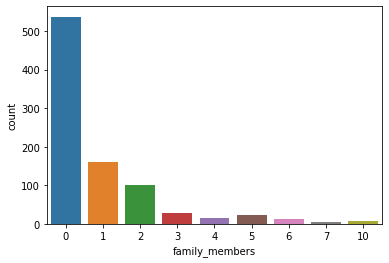

In [68]:
sns.countplot(df["family_members"])

- insights: alone category people travelled more 

## Age

In [69]:
df["Age"].agg(["min","max","mean"])

min      0.420000
max     80.000000
mean    29.361582
Name: Age, dtype: float64

- average age of passengers : 29

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

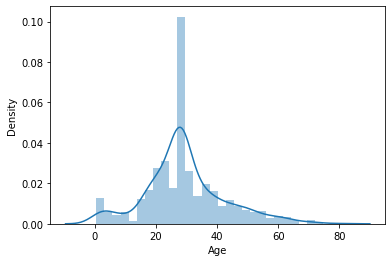

In [70]:
sns.distplot(df["Age"])

### OR

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

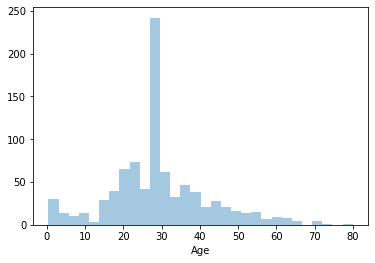

In [71]:
sns.distplot(df["Age"],kde=False) #for histogram only

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


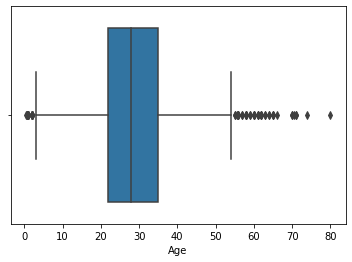

In [72]:
sns.boxplot(df["Age"]);

In [73]:
df["Age"].skew()

0.5102446555756495

In [74]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

- 20-40 was average age of travellers

- how many people are of different age ? 
- binning :column transform from numeric to discrete (discretization)

In [75]:
import numpy as np

In [76]:
df["age_category"]=pd.cut(df.Age,[0,14,25,60,np.inf],labels=["children","youth","adults","senior_citizens"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_name,salutation,family_members,age_category
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,B,Mr,1,youth
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,Mrs,1,adults
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,B,Miss,0,adults
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,C,Mrs,1,adults
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,B,Mr,0,adults


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


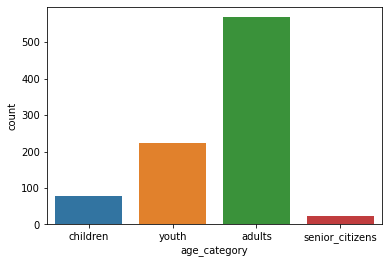

In [77]:
sns.countplot(df["age_category"]);

### of which age people travelled more?
## adults

## Fare

In [78]:
df["Fare"].agg(["min","max","mean"])

min       0.000000
max     512.329200
mean     32.204208
Name: Fare, dtype: float64

- average fare of passengers : 32

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


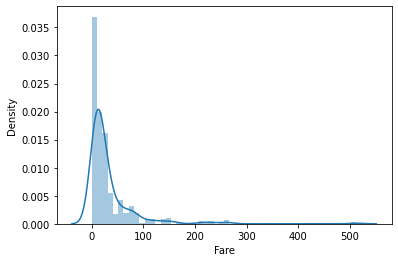

In [79]:
sns.distplot(df["Fare"]);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


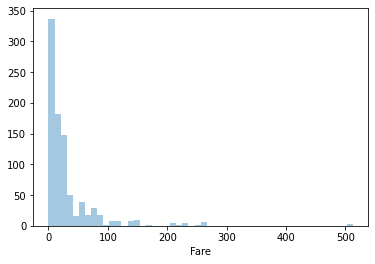

In [80]:
sns.distplot(df["Fare"],kde=False);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


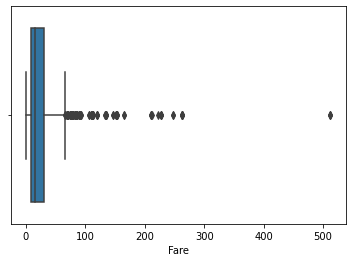

In [81]:
sns.boxplot(df["Fare"]);

In [82]:
df["Fare"].skew()

4.787316519674893

In [83]:
df["Fare"].nunique()

248

- 0-50 was average fare of travellers

### bivariate analysis of PClass and Age

In [84]:
import pandas as pd

In [85]:
df.groupby("Pclass")["Age"].mean()

Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64

### barplot

### through visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


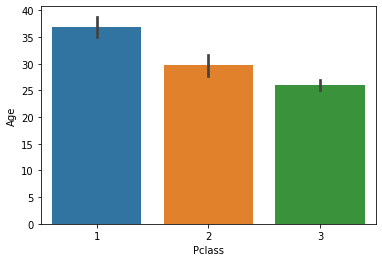

In [86]:
sns.barplot(df["Pclass"],df["Age"]);

## find out the avg age of male and female

In [87]:
df.groupby("Sex")["Age"].mean()

Sex
female    27.929936
male      30.140676
Name: Age, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


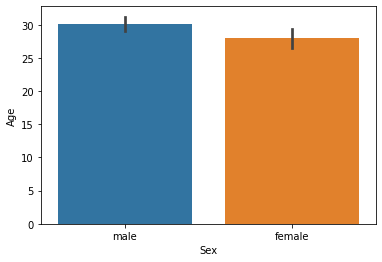

In [88]:
sns.barplot(df["Sex"],df["Age"]);

## find out the avg age of the passengers who survived or not survived

In [89]:
df.groupby("Survived")["Age"].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


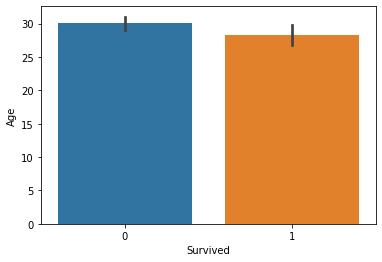

In [90]:
sns.barplot(df["Survived"],df["Age"]);

## of which age male/female survived or not   ## multivariate analysis

In [91]:
df.groupby(["Survived","Sex"])["Age"].mean()

Survived  Sex   
0         female    25.666667
          male      30.783120
1         female    28.716738
          male      27.382294
Name: Age, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


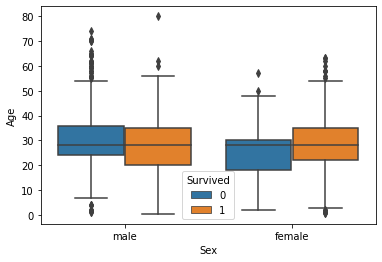

In [92]:
sns.boxplot(df["Sex"],df["Age"],hue=df["Survived"]);

### comparison of passenger age with respect to survived or not survived

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


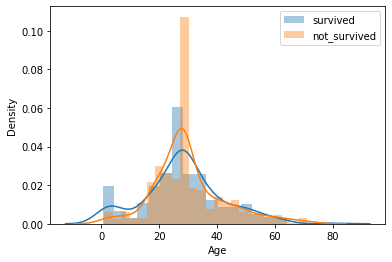

In [93]:
age_surv=df[df["Survived"]==1]["Age"]
age_nsurv=df[df["Survived"]==0]["Age"]
sns.distplot(age_surv,label="survived")
sns.distplot(age_nsurv,label="not_survived")
plt.legend();

- children have more probability to be alive
- young age people died more

In [94]:
df.groupby("Embarked")["Age"].mean()

Embarked
C    30.178095
Q    28.032468
S    29.307663
Name: Age, dtype: float64

- through visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


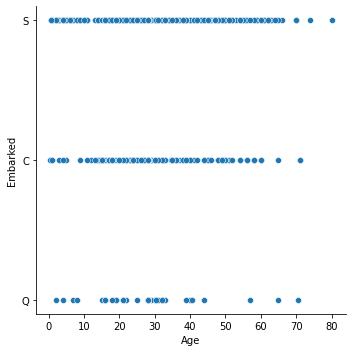

In [95]:
sns.relplot(df["Age"],df["Embarked"]);

- Insights:
- 80 aged person travelled in S
- More people travelled in S
- Less people travelled in Q compared to S and C

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


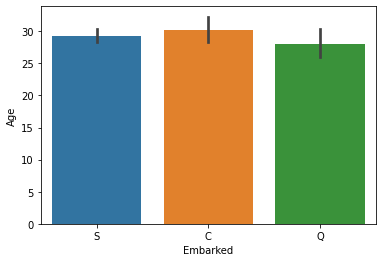

In [96]:
sns.barplot(df["Embarked"],df["Age"]);

In [97]:
df.groupby(["Embarked","Sex"])["Age"].mean()

Embarked  Sex   
C         female    28.287671
          male      31.630737
Q         female    26.763889
          male      29.146341
S         female    28.007317
          male      29.912132
Name: Age, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


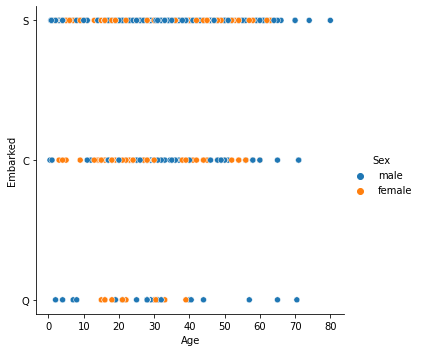

In [98]:
sns.relplot(df["Age"],df["Embarked"],hue=df["Sex"],data=df);

- Insights: max aged and min aged person were male

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


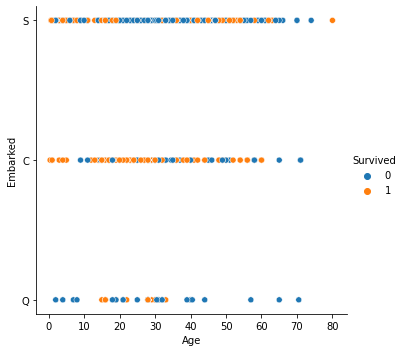

In [99]:
sns.relplot(df["Age"],df["Embarked"],hue=df["Survived"],data=df);

- Max and min aged person both survived 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


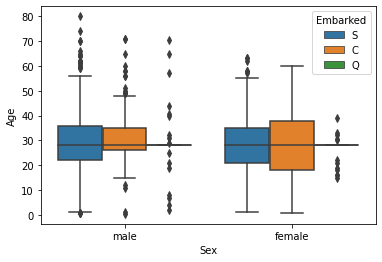

In [100]:
sns.boxplot(df["Sex"],df["Age"],hue=df["Embarked"]);

- comparison of avg passenger age with respect to embarked and sex

In [101]:
df.groupby(["Embarked","Sex"])["Age"].mean()

Embarked  Sex   
C         female    28.287671
          male      31.630737
Q         female    26.763889
          male      29.146341
S         female    28.007317
          male      29.912132
Name: Age, dtype: float64

##  Age and Fare - both numeric, plot scatter

<AxesSubplot:xlabel='Age', ylabel='Fare'>

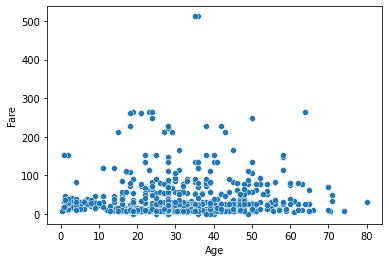

In [102]:
sns.scatterplot(x=df["Age"],y=df["Fare"])

- children fare is constant
- young people fare was more compared to others

- 1. find out the average fare of each pclass of passengers
- 2. find out the average fare spent by male and female of each class
- 3. of which age groups(age_category) people died most
- 4. of which salutations people died most
- 5. who died most males or females(survived and sex)
- 6. of which embarked passengers died more
- 7. find out the min, max and average fare spent by survived  or not survived passengers
- 8. how many males or females survived of each class
- 9. how fare is related with family memebers(both numeric)

In [103]:
# 1 find out the average fare of each pclass of passengers
df.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


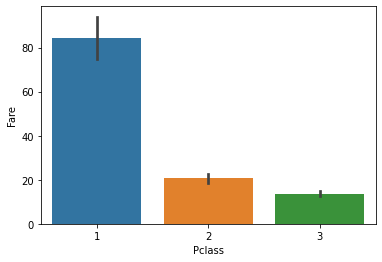

In [104]:
sns.barplot(df["Pclass"],df["Fare"]);

In [105]:
# 2 find out the average fare spent by male and female of each class
df.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


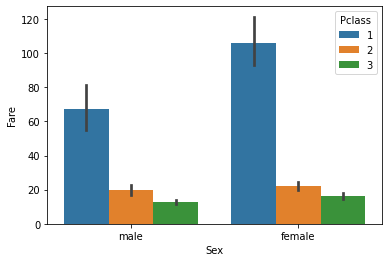

In [106]:
sns.barplot(df["Sex"],df["Fare"],hue=df["Pclass"]);

In [107]:
# 3 of which age groups(age_category) people died most
df.groupby("Survived")["age_category"].value_counts()

Survived                 
0         adults             355
          youth              145
          children            32
          senior_citizens     17
1         adults             213
          youth               79
          children            45
          senior_citizens      5
Name: age_category, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


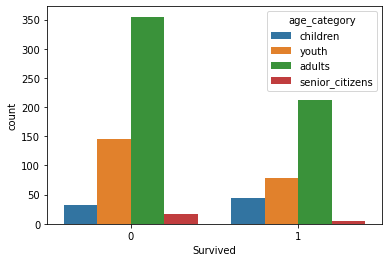

In [108]:
sns.countplot(df["Survived"],hue=df["age_category"],data=df);

- mostly adults have been died

In [109]:
# 4 of which salutations people died most
df.groupby("Survived")["salutation"].value_counts()

Survived  salutation   
0          Mr              436
           Miss             55
           Mrs              26
           Master           17
           Rev               6
           Dr                4
           Capt              1
           Col               1
           Don               1
           Jonkheer          1
           Major             1
1          Miss            127
           Mrs              99
           Mr               81
           Master           23
           Dr                3
           Mlle              2
           Col               1
           Lady              1
           Major             1
           Mme               1
           Ms                1
           Sir               1
           the Countess      1
Name: salutation, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


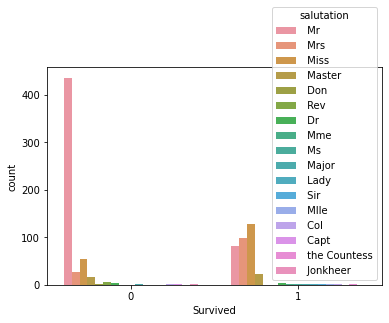

In [110]:
sns.countplot(df["Survived"],hue=df["salutation"],data=df);

- Men(Mr) died most

In [111]:
# 5 who died most males or females(survived and sex)
df.groupby(["Sex"])["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


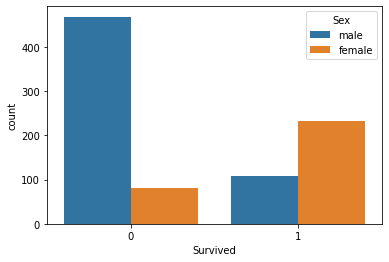

In [112]:
sns.countplot(df["Survived"],hue=df["Sex"],data=df);

- Male survived less

In [113]:
# 6 of which embarked passengers died more
df.groupby(["Survived"])["Embarked"].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           219
          C            93
          Q            30
Name: Embarked, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


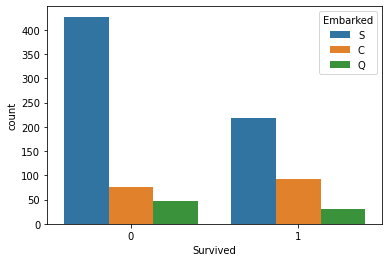

In [114]:
sns.countplot(df["Survived"],hue=df["Embarked"],data=df);

- S port people died most

In [115]:
# 7 find out the min, max and average fare spent by survived or not survived passengers
df.groupby(["Survived"])["Fare"].agg(["min","max","mean"])

,min,max,mean
Survived,,,
0,0.0,263.0000,22.117887
1,0.0,512.3292,48.395408


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

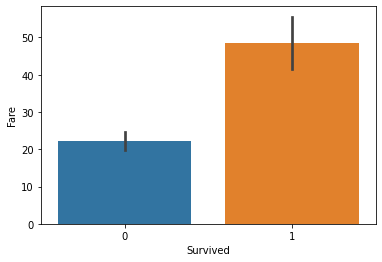

In [116]:
sns.barplot(df["Survived"],df["Fare"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

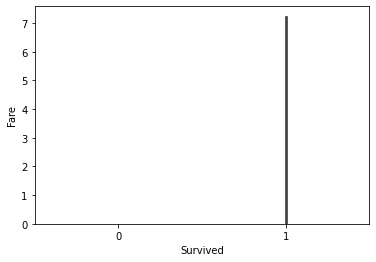

In [117]:
sns.barplot(df["Survived"],df["Fare"],estimator=min)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

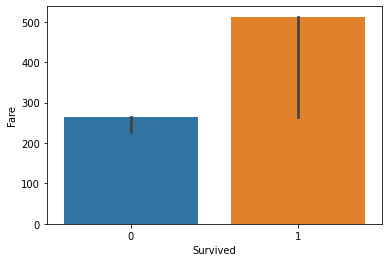

In [118]:
sns.barplot(df["Survived"],df["Fare"],estimator=max)

In [119]:
# 8 how many males or females survived of each class
df.groupby(["Sex","Pclass"])["Survived"].value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


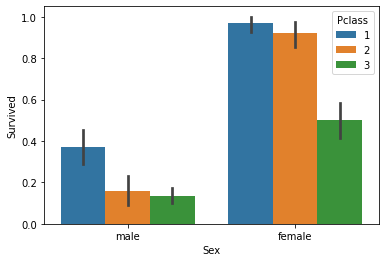

In [120]:
sns.barplot(df["Sex"],df["Survived"],hue="Pclass",data=df);

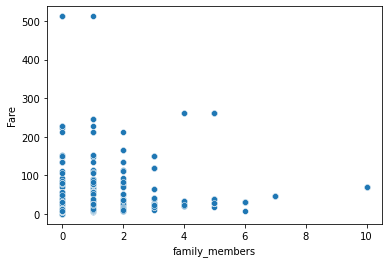

In [121]:
# 9 how fare is related with family memebers(both numeric)
sns.scatterplot(x="family_members",y="Fare",data=df);

In [122]:
df[["family_members","Fare"]].corr()

,family_members,Fare
family_members,1.000000,0.217138
Fare,0.217138,1.000000


<AxesSubplot:>

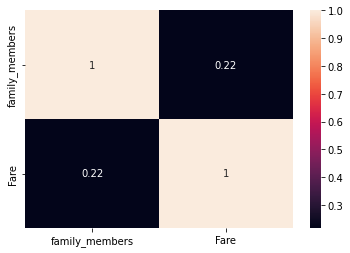

In [123]:
sns.heatmap(df[["family_members","Fare"]].corr(),annot=True)